In [1]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# TXT FILE

In [2]:
label1 = pd.read_csv('acne_1.csv', index_col=0)
label2 = pd.read_csv('acne_2.csv', index_col=0)
label_df = label1.append(label2).reset_index(drop=True)
label_df

,id,grade,s0,s1,s2,s3,s4
0,cklmbf086000i3a62l63tud9h,1,1,1,0,2,0
1,cklmfyw2600003b68ypk1esxh,0,0,0,0,0,0
2,ckln4c4v3000h3a68a9nb5wja,1,0,1,1,3,0
3,ckln4ezzy00193a68viu41oqj,1,5,1,0,1,0
4,ckln4sz6200323a68fz6m63z4,1,3,1,9,4,0
...,...,...,...,...,...,...,...
1567,ckmq560k804sk3a68bulpkbbe,2,39,34,67,2,0
1568,ckmq59np904x43a68i1gnrqf6,2,22,9,4,8,0
1569,ckmq5dvek053j3a68wj7r47n5,2,53,5,2,1,0
1570,ckmr1x2tz00cx3a68u202gpzs,2,123,4,6,21,0


In [3]:
# label1 = json.load(open('id_to_grade1.txt', 'r'))
# label2 = json.load(open('id_to_grade2.txt', 'r'))

# len(label1), len(label2)

# label1.update(label2)

# label = label1
# img_ids, labels = zip(*label.items())

# label_df = pd.DataFrame({'img_id': img_ids,
#                         'label': labels})
# label_df

# PREDICTION

In [4]:
data = pd.read_csv('prediction.csv', index_col=0)
data

,img_id,t_0,t_1,t_2,t_3,t_4,p_0,p_1,p_2,p_3,p_4
0,ckm4igtie00jz3a68lojn7sjs,48,5,2,2,0,0,6,4,3,0
1,ckm2v710u00573a68x61fiogn,7,0,40,11,0,0,0,21,2,0
2,cklsya68i00n13a68mfpdpzkj,10,0,48,29,0,0,0,24,11,0
3,cklqdqdjl01523a68y4lefnv4,12,1,10,7,0,0,1,15,13,0
4,ckltixn8w01h33a68jr0yb9xa,18,15,54,20,1,0,16,23,13,1
...,...,...,...,...,...,...,...,...,...,...,...
719,cklvwk4zy01303a6844xvvg3p,3,0,20,6,0,0,0,13,5,0
720,ckm3cjbge00eu3b684bmrt4kn,4,0,2,8,0,0,1,3,10,0
721,ckm3mbqrr003y3a68q47mizew,5,1,30,10,0,0,0,24,8,0
722,ckls4ugoq00gq3a68u5ddifuw,4,8,31,23,0,0,5,16,19,0


In [5]:
data = pd.merge(data, label_df, how='right', left_on='img_id', right_on='id')
data

,img_id,t_0,t_1,t_2,t_3,t_4,p_0,p_1,p_2,p_3,p_4,id,grade,s0,s1,s2,s3,s4
0,cklmbf086000i3a62l63tud9h,1.0,1.0,0.0,2.0,0.0,0.0,3.0,1.0,11.0,0.0,cklmbf086000i3a62l63tud9h,1,1,1,0,2,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cklmfyw2600003b68ypk1esxh,0,0,0,0,0,0
2,ckln4c4v3000h3a68a9nb5wja,0.0,1.0,1.0,3.0,0.0,0.0,1.0,5.0,4.0,0.0,ckln4c4v3000h3a68a9nb5wja,1,0,1,1,3,0
3,ckln4ezzy00193a68viu41oqj,5.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,ckln4ezzy00193a68viu41oqj,1,5,1,0,1,0
4,ckln4sz6200323a68fz6m63z4,3.0,1.0,9.0,4.0,0.0,0.0,2.0,27.0,10.0,0.0,ckln4sz6200323a68fz6m63z4,1,3,1,9,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ckmq560k804sk3a68bulpkbbe,2,39,34,67,2,0
1568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ckmq59np904x43a68i1gnrqf6,2,22,9,4,8,0
1569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ckmq5dvek053j3a68wj7r47n5,2,53,5,2,1,0
1570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ckmr1x2tz00cx3a68u202gpzs,2,123,4,6,21,0


In [6]:
# data[data['label']=='4']

In [7]:
# x = data[['t_0', 't_1','t_2','t_3','t_4']].values
x = data[['s0', 's1','s2','s3','s4']].values
y = data['grade'].values

In [8]:
import numpy as np
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4]), array([211, 883, 361,  83,  34]))

In [9]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

In [12]:
model = LGBMClassifier()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(acc_train, acc_test)

0.9957591178965225 0.8982188295165394


In [13]:
oos_data = data[['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'grade']].dropna().astype(int)
oos_data_cp = oos_data.copy()
oos_label = oos_data.pop('grade')
oos_data_np = oos_data.values

size = 300
seed = 1

In [14]:
shuffle_list = []
acc_oos = 0

oos_pred = model.predict(oos_data_np)
acc_oos = accuracy_score(oos_label, oos_pred)
print('Origin accuracy',acc_oos)
# get only accurate rows
acc_idx = oos_label == oos_pred
inacc_idx = ~acc_idx
# accurate data + a small faction of inaccurate data
new_oos_data = oos_data_cp[acc_idx].append(oos_data_cp[inacc_idx][:100])
# new_oos_data = new_oos_data.sample(frac=1)
new_oos_label = new_oos_data.pop('grade')
new_oos_data_np = new_oos_data.values
oos_pred = model.predict(new_oos_data_np)
acc_oos = accuracy_score(new_oos_label, oos_pred)
print('After calibrate', acc_oos)
print(classification_report(new_oos_label, oos_pred))
print(confusion_matrix(new_oos_label, oos_pred))

Origin accuracy 0.7628294036061026
After calibrate 0.8461538461538461
              precision    recall  f1-score   support

           0       0.81      0.58      0.68        36
           1       0.93      0.89      0.91       430
           2       0.70      0.83      0.76       119
           3       0.64      0.61      0.62        41
           4       0.68      0.96      0.79        24

    accuracy                           0.85       650
   macro avg       0.75      0.77      0.75       650
weighted avg       0.86      0.85      0.85       650

[[ 21  12   3   0   0]
 [  5 382  36   6   1]
 [  0  12  99   7   1]
 [  0   3   4  25   9]
 [  0   0   0   1  23]]


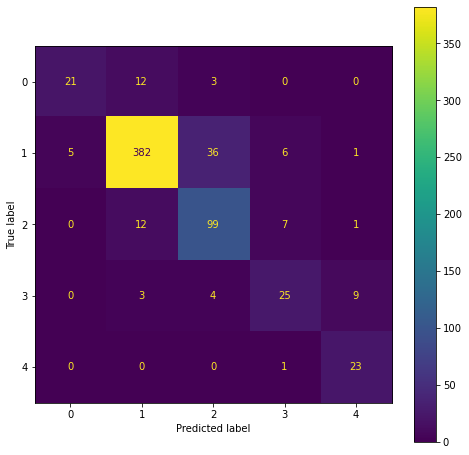

In [15]:
fig, ax=plt.subplots(figsize=(8,8))
plot_confusion_matrix(model,new_oos_data_np, new_oos_label,ax=ax)
plt.show()

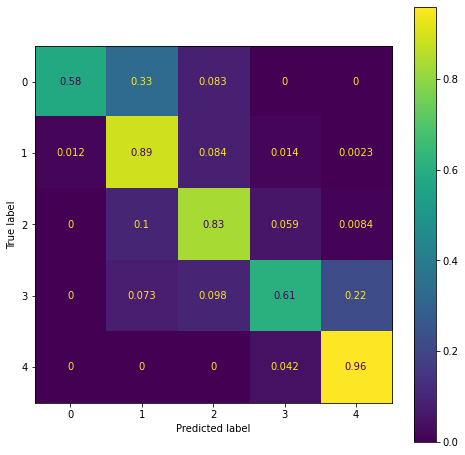

In [16]:
fig, ax=plt.subplots(figsize=(8,8))
plot_confusion_matrix(model,new_oos_data_np, new_oos_label, normalize='true', ax=ax)
plt.show()

In [17]:
reconstruct = data[data.index.isin(new_oos_data.index)][['img_id','p_0', 'p_1', 'p_2', 'p_3', 'p_4','grade']]
reconstruct

,img_id,p_0,p_1,p_2,p_3,p_4,grade
0,cklmbf086000i3a62l63tud9h,0.0,3.0,1.0,11.0,0.0,1
2,ckln4c4v3000h3a68a9nb5wja,0.0,1.0,5.0,4.0,0.0,1
3,ckln4ezzy00193a68viu41oqj,0.0,1.0,5.0,3.0,0.0,1
4,ckln4sz6200323a68fz6m63z4,0.0,2.0,27.0,10.0,0.0,1
5,ckln512zz005f3a68gypx8iki,0.0,2.0,21.0,7.0,0.0,2
...,...,...,...,...,...,...,...
1010,ckm4qupil00kf3a68xrh0fx5b,0.0,1.0,14.0,5.0,0.0,1
1012,ckm4r40ex00vx3a68py3snmtk,0.0,0.0,12.0,2.0,0.0,0
1013,ckm4rcq8y009h3a683o9qjdkl,0.0,11.0,6.0,6.0,0.0,2
1014,ckm4rkj7w00cr3a68sz12ptyl,0.0,0.0,13.0,1.0,0.0,0


In [18]:
reconstruct.to_csv('final_imageids.csv')

In [19]:
y_true = reconstruct.pop('grade')

In [20]:
imgids = reconstruct.pop('img_id')

In [21]:
y_pred = model.predict(reconstruct)

In [22]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.58      0.68        36
           1       0.93      0.89      0.91       430
           2       0.70      0.83      0.76       119
           3       0.64      0.61      0.62        41
           4       0.68      0.96      0.79        24

    accuracy                           0.85       650
   macro avg       0.75      0.77      0.75       650
weighted avg       0.86      0.85      0.85       650



In [23]:
# imgids.to_csv('final_imageids.csv')